In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from models.mdc import NearestCentroidMahalanobis
from models.train import Train

# Raw Data

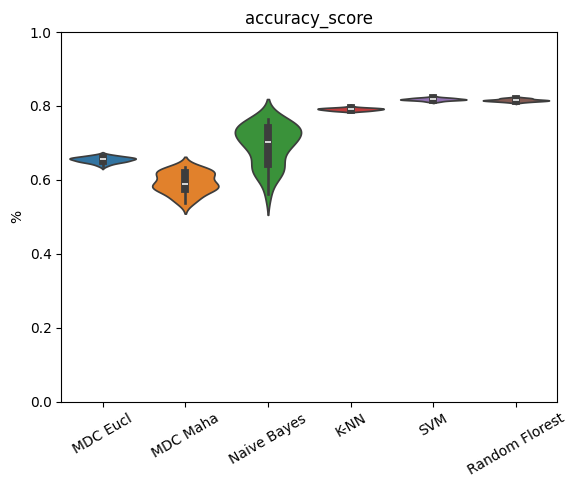

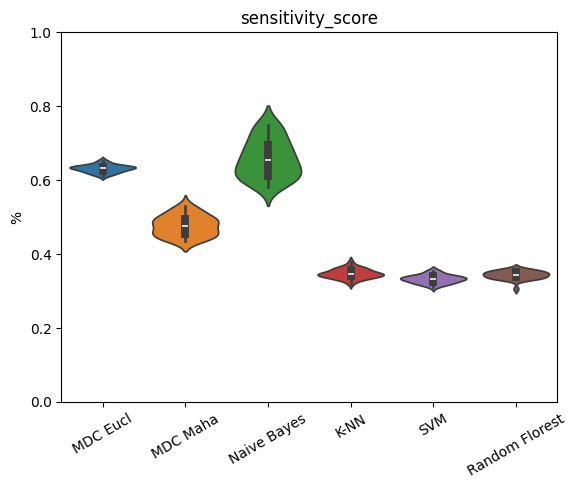

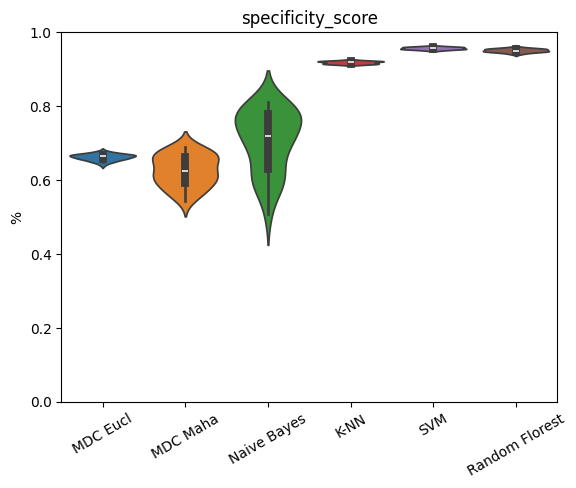

In [5]:
csvs = ['NearestCentroid', 'NearestCentroidMahalanobis', 'GaussianNB', 'KNeighborsClassifier', 'SVM', 'RandomForestClassifier']
labels = ['MDC Eucl', 'MDC Maha', 'Naive Bayes', 'K-NN', 'SVM', 'Random Florest']

def visual_score(paths, lables, feature):
    accuracy = {}
    for csv in paths:
        df = pd.read_csv(f"./exp/{csv}.csv")
        accuracy[csv] = df[feature]
    
    plt.figure()
    sns.violinplot(data=accuracy)
    plt.title(feature)
    plt.ylim(0, 1)
    plt.ylabel("%")
    plt.xticks(rotation=30)
    plt.xticks(range(len(lables)), lables)
    plt.show()

visual_score(csvs, labels, 'accuracy_score')
visual_score(csvs, labels, 'sensitivity_score')
visual_score(csvs, labels, 'specificity_score')

# Classification with LDA

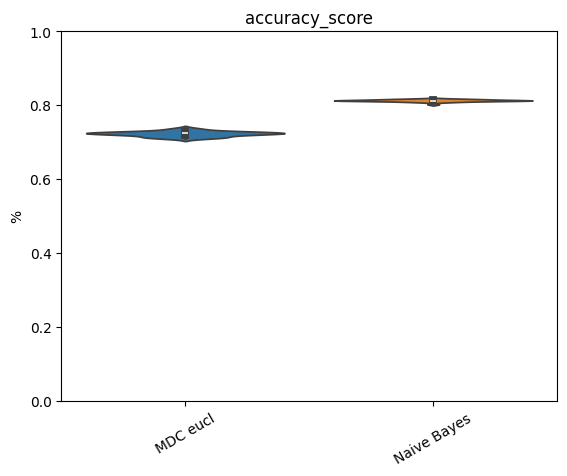

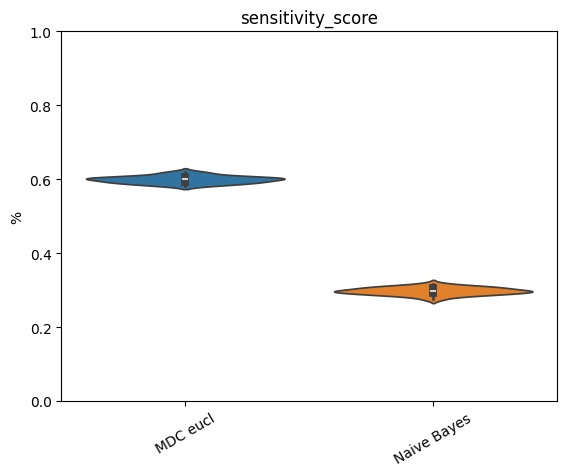

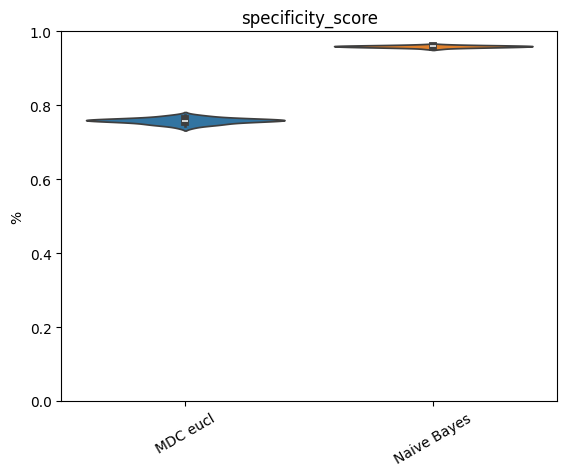

In [7]:
csvs = ['LDA_MDC_euc', 'LDA_Naive_Bayses']
labels = ['MDC eucl', 'Naive Bayes']
visual_score(csvs, labels, 'accuracy_score')
visual_score(csvs, labels, 'sensitivity_score')
visual_score(csvs, labels, 'specificity_score')

# Classification with PCA

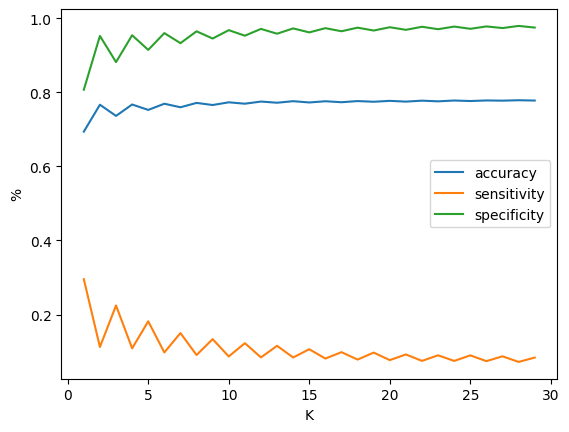

In [2]:
data = pd.read_csv("./exp/PCA_bestK.csv")

plt.figure()

plt.plot(data['k'], data['accuracy_score'], label='accuracy')
plt.plot(data['k'], data['sensitivity_score'], label='sensitivity')
plt.plot(data['k'], data['specificity_score'], label='specificity')

plt.legend()
plt.xlabel('K')
plt.ylabel('%')
plt.show()

In [3]:
acc = np.loadtxt('./exp/PCA_svm_acc0.txt')
sen = np.loadtxt('./exp/PCA_svm_sen0.txt')
spp = np.loadtxt('./exp/PCA_svm_spp0.txt')

indice_maior_valor = np.unravel_index(np.argmax(sen), sen.shape)

C_values = [2**i for i in range(-5, 12)]
gamma_values = [2**i for i in range(-30, 5)]
print(gamma_values)
print(indice_maior_valor)
print("Best C: ", C_values[indice_maior_valor[0]], "Best Gamma: ", gamma_values[indice_maior_valor[1]])

[9.313225746154785e-10, 1.862645149230957e-09, 3.725290298461914e-09, 7.450580596923828e-09, 1.4901161193847656e-08, 2.9802322387695312e-08, 5.960464477539063e-08, 1.1920928955078125e-07, 2.384185791015625e-07, 4.76837158203125e-07, 9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
(16, 5)
Best C:  2048 Best Gamma:  2.9802322387695312e-08


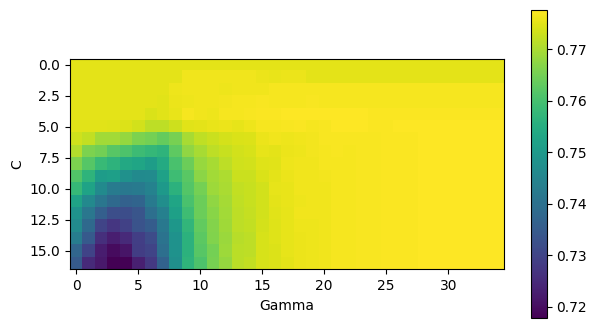

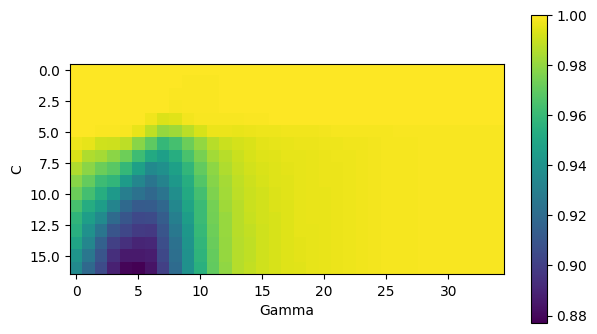

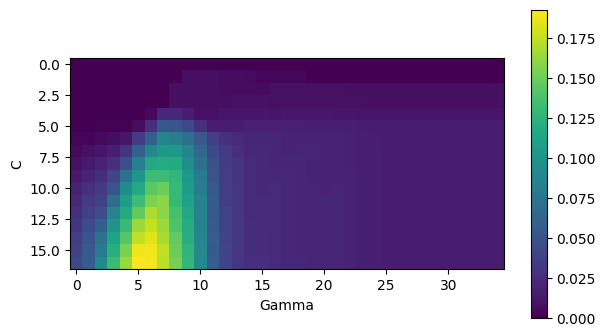

In [12]:
fig = plt.figure(figsize=(7, 4))
plt.imshow(acc, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

fig = plt.figure(figsize=(7, 4))
plt.imshow(spp, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

fig = plt.figure(figsize=(7, 4))
plt.imshow(sen, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


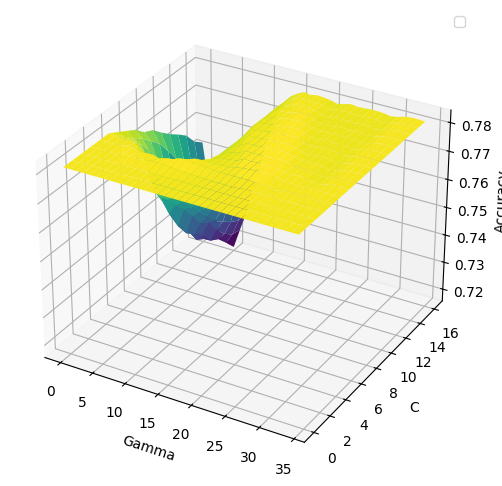

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


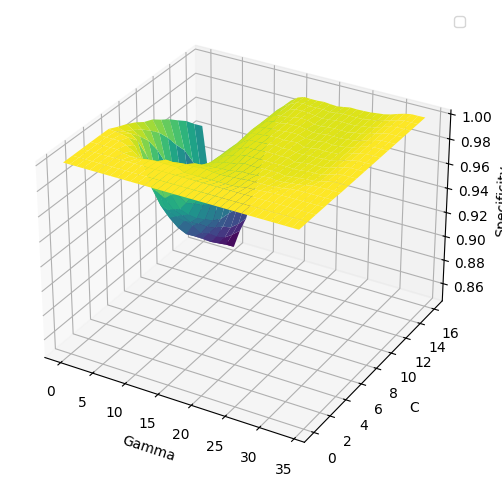

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


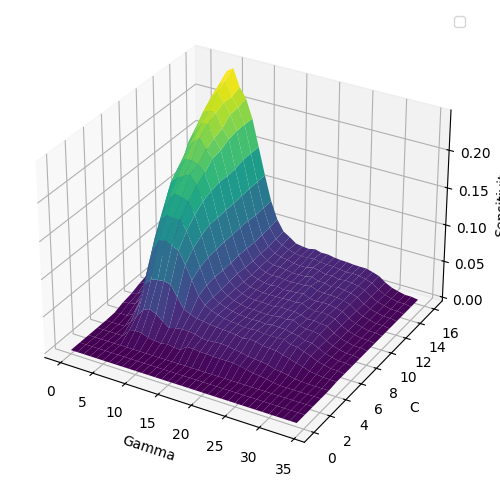

In [5]:
def plot_3D(data, label):
    x = np.arange(0, 35)
    y = np.arange(0, 17)
    x, y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, data, cmap='viridis')

    ax.set_xlabel('Gamma')
    ax.set_ylabel('C')
    ax.set_zlabel(label)

    plt.legend()
    plt.show()

plot_3D(acc, 'Accuracy')
plot_3D(spp, 'Specificity')
plot_3D(sen, 'Sensitivity')

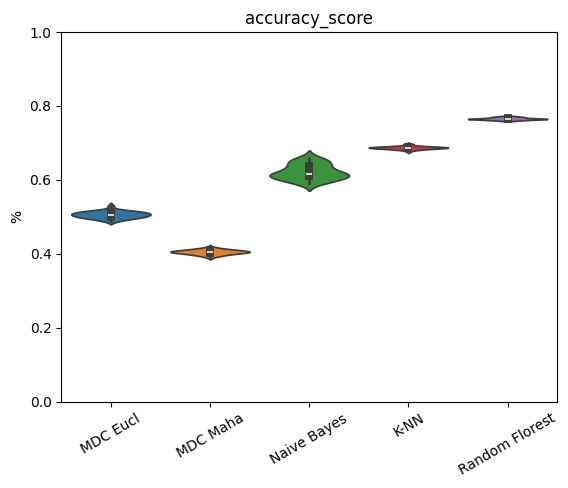

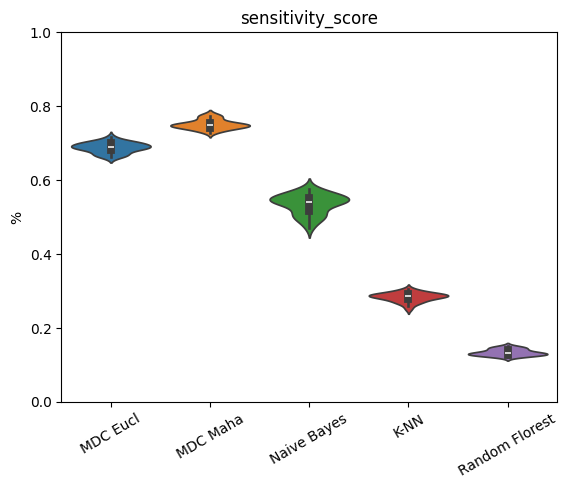

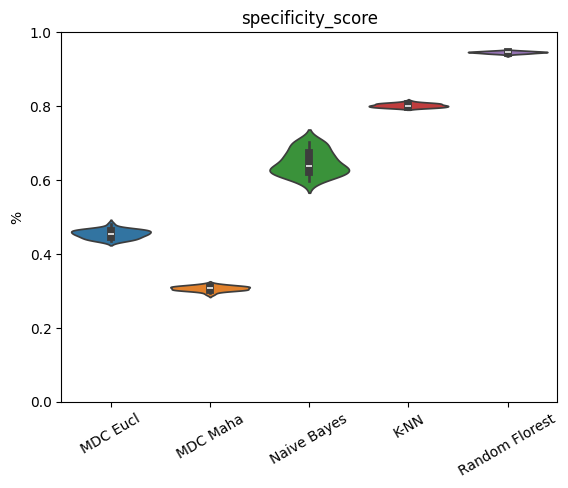

In [10]:
csvs = ['NearestCentroid', 'NearestCentroidMahalanobis', 'GaussianNB', 'KNeighborsClassifier', 'RandomForestClassifier']
labels = ['MDC Eucl', 'MDC Maha', 'Naive Bayes', 'K-NN', 'Random Florest']

def visual_score(paths, labels, feature):
    accuracy = {}
    for csv in paths:
        
        df = pd.read_csv(f"./new_exp/Classification_PCA_{csv}.csv")
        accuracy[csv] = df[feature]
    
    plt.figure()
    sns.violinplot(data=accuracy)
    plt.title(feature)
    plt.ylim(0, 1)
    plt.ylabel("%")
    plt.xticks(rotation=30)
    labels = ['MDC Eucl', 'MDC Maha', 'Naive Bayes', 'K-NN', 'Random Florest']
    plt.xticks(range(len(labels)), labels)
    plt.show()

visual_score(csvs, labels, 'accuracy_score')
visual_score(csvs, labels, 'sensitivity_score')
visual_score(csvs, labels, 'specificity_score')

In [13]:

INPUT_PATH = '../data/credit_card_clients.csv'
data = pd.read_csv(INPUT_PATH)
data.rename(columns={'default payment next month': 'target'}, inplace=True)
data.drop(["ID"], axis=1, inplace=True)

y = data['target'].copy()
X = data.copy()
X.drop(['target'], axis=1, inplace=True)

error = {
    'accuracy_score': [],
    'sensitivity_score': [],
    'specificity_score': []
}

for i in range(1,30):
    print(i)
    knn_params = { 'n_neighbors': i }
    trainer = Train(X, y, KNeighborsClassifier, 5, **knn_params)
    trainer.fit()
    error['accuracy_score'].append(trainer.error['accuracy_score'].mean())
    error['sensitivity_score'].append(trainer.error['sensitivity_score'].mean())
    error['specificity_score'].append(trainer.error['specificity_score'].mean())

1
0
1
2
3
4
2
0
1
2
3
4
3
0
1
2
3
4
4
0
1
2
3
4
5
0
1
2
3
4
6
0
1
2
3
4
7
0
1
2
3
4
8
0
1
2
3
4
9
0
1
2
3
4
10
0
1
2
3
4
11
0
1
2
3
4
12
0
1
2
3
4
13
0
1
2
3
4
14
0
1
2
3
4
15
0
1
2
3
4
16
0
1
2
3
4
17
0
1
2
3
4
18
0
1
2
3
4
19
0
1
2
3
4
20
0
1
2
3
4
21
0
1
2
3
4
22
0
1
2
3
4
23
0
1
2
3
4
24
0
1
2
3
4
25
0
1
2
3
4
26
0
1
2
3
4
27
0
1
2
3
4
28
0
1
2
3
4
29
0
1
2
3
4


# Classification with LDA

In [21]:
error_lda = pd.DataFrame(error)
display(error_lda)

,accuracy_score,sensitivity_score,specificity_score
0,0.728233,0.379352,0.827306
1,0.784733,0.213112,0.947058
2,0.773333,0.362924,0.889878
3,0.795467,0.253504,0.949369
4,0.790767,0.338809,0.919110
5,0.800300,0.265561,0.952151
6,0.799767,0.333986,0.932035
7,0.803233,0.274604,0.953349
8,0.805300,0.332178,0.939653
9,0.808233,0.293142,0.954505


In [27]:
index_min_sensitivity = error_lda['sensitivity_score'].idxmax()
print(error_lda.iloc[index_min_sensitivity])
print(index_min_sensitivity)

accuracy_score       0.728233
sensitivity_score    0.379352
specificity_score    0.827306
Name: 0, dtype: float64
0


# Classification with AUC

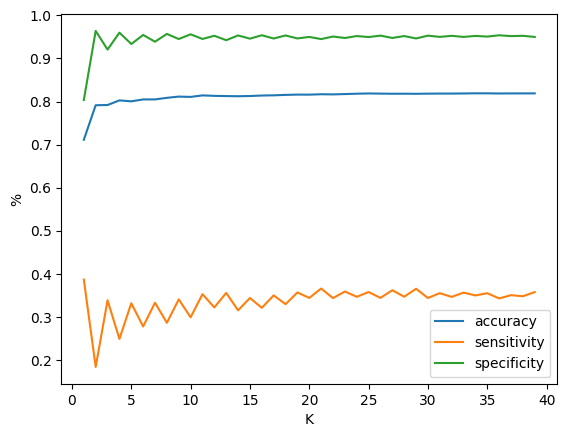

In [55]:
data = pd.read_csv("./exp/AUC_bestK.csv")

plt.figure()

plt.plot(data['k'], data['accuracy_score'], label='accuracy')
plt.plot(data['k'], data['sensitivity_score'], label='sensitivity')
plt.plot(data['k'], data['specificity_score'], label='specificity')

plt.legend()
plt.xlabel('K')
plt.ylabel('%')
plt.show()

In [14]:
indice_maior_valor = np.unravel_index(np.argmax(data['sensitivity_score'][1:]), data['sensitivity_score'].shape)

print(indice_maior_valor)

(1,)


In [15]:
acc = np.loadtxt('./exp/AUC_svm_acc.txt')
sen = np.loadtxt('./exp/AUC_svm_sen.txt')
spp = np.loadtxt('./exp/AUC_svm_spp.txt')

indice_maior_valor = np.unravel_index(np.argmax(sen), sen.shape)

C_values = [2**i for i in range(-5, 5)]
gamma_values = [2**i for i in range(-15, 5)]
print(indice_maior_valor)
print("Best C: ", C_values[indice_maior_valor[0]], "Best Gamma: ", gamma_values[indice_maior_valor[1]])

(6, 13)
Best C:  2 Best Gamma:  0.25


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


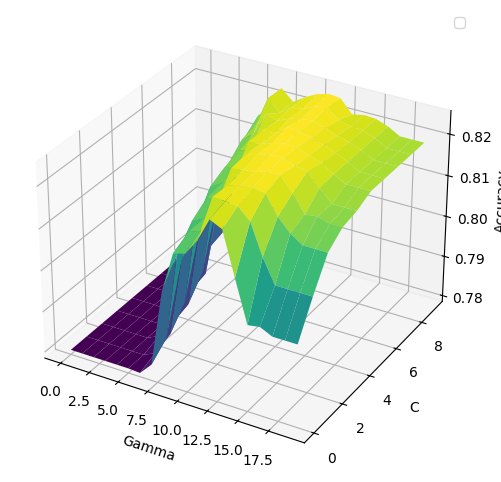

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


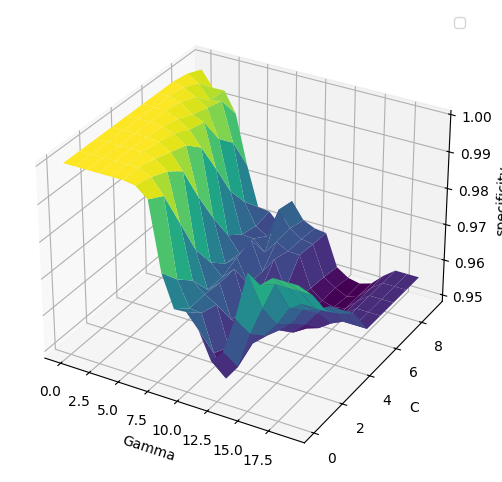

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


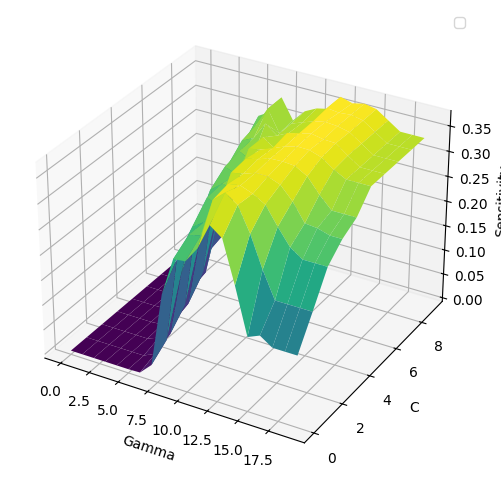

In [16]:
def plot_3D(data, label):
    x = np.arange(0, 20)
    y = np.arange(0, 10)
    x, y = np.meshgrid(x, y)

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, data, cmap='viridis')

    ax.set_xlabel('Gamma')
    ax.set_ylabel('C')
    ax.set_zlabel(label)

    plt.legend()
    plt.show()

plot_3D(acc, 'Accuracy')
plot_3D(spp, 'specificity')
plot_3D(sen, 'Sensitivity')

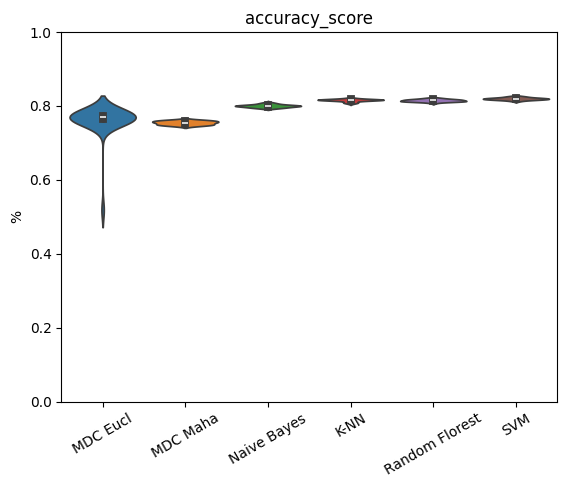

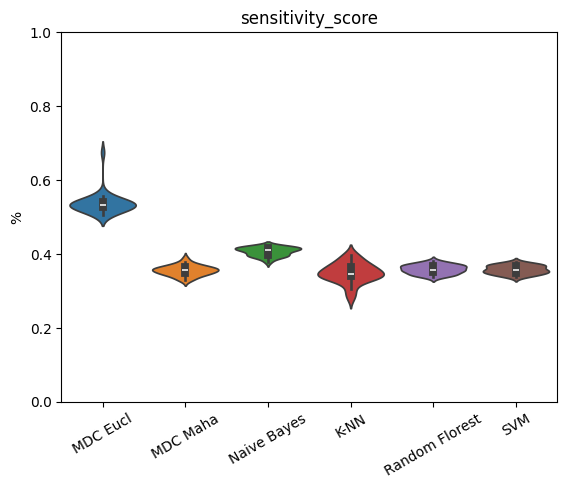

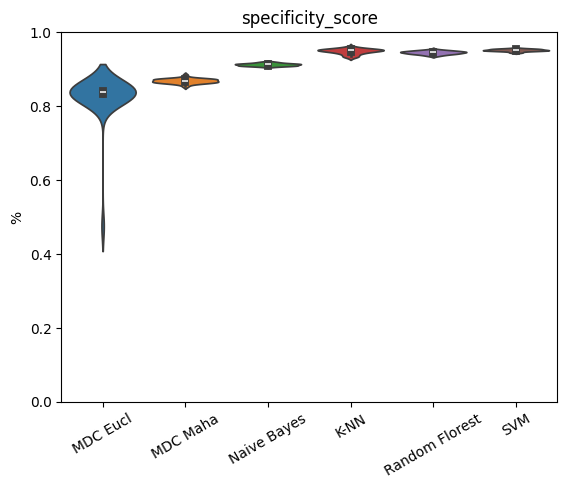

In [11]:
csvs = ['NearestCentroid', 'NearestCentroidMahalanobis', 'GaussianNB', 'KNeighborsClassifier', 'RandomForestClassifier', 'SVM']
labels = ['MDC Eucl', 'MDC Maha', 'Naive Bayes', 'K-NN', 'Random Florest', 'SVM']

def visual_score(paths, labels, feature):
    accuracy = {}
    for csv in paths:
        
        df = pd.read_csv(f"./new_exp/Classification_AUC_{csv}.csv")
        accuracy[csv] = df[feature]
    
    plt.figure()
    sns.violinplot(data=accuracy)
    plt.title(feature)
    plt.ylim(0, 1)
    plt.ylabel("%")
    plt.xticks(rotation=30)
    plt.xticks(range(len(labels)), labels)
    plt.show()

visual_score(csvs, labels, 'accuracy_score')
visual_score(csvs, labels, 'sensitivity_score')
visual_score(csvs, labels, 'specificity_score')

# CLassification with KW

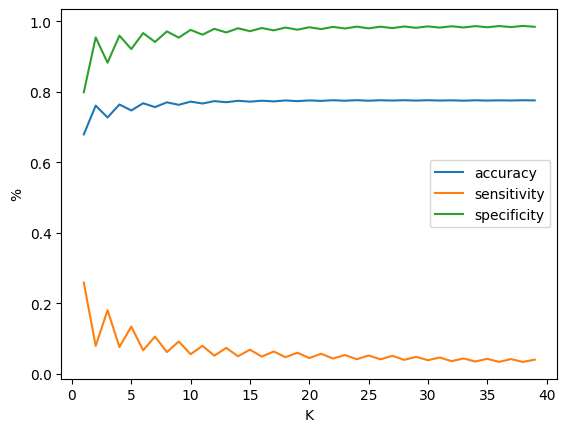

In [6]:
data = pd.read_csv("./exp/KW_bestK.csv")

plt.figure()

plt.plot(data['k'], data['accuracy_score'], label='accuracy')
plt.plot(data['k'], data['sensitivity_score'], label='sensitivity')
plt.plot(data['k'], data['specificity_score'], label='specificity')

plt.legend()
plt.xlabel('K')
plt.ylabel('%')
plt.show()

In [17]:
acc = np.loadtxt('./exp/KW_svm_acc0.txt')
sen = np.loadtxt('./exp/KW_svm_sen0.txt')
spp = np.loadtxt('./exp/KW_svm_spp0.txt')

indice_maior_valor = np.unravel_index(np.argmax(sen), sen.shape)

C_values = [2**i for i in range(-5, 12)]
gamma_values = [2**i for i in range(-30, 5)]
print(C_values)
print(gamma_values)
print(indice_maior_valor)
print("Best C: ", C_values[indice_maior_valor[0]], "Best Gamma: ", gamma_values[indice_maior_valor[1]])

[0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[9.313225746154785e-10, 1.862645149230957e-09, 3.725290298461914e-09, 7.450580596923828e-09, 1.4901161193847656e-08, 2.9802322387695312e-08, 5.960464477539063e-08, 1.1920928955078125e-07, 2.384185791015625e-07, 4.76837158203125e-07, 9.5367431640625e-07, 1.9073486328125e-06, 3.814697265625e-06, 7.62939453125e-06, 1.52587890625e-05, 3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16]
(16, 5)
Best C:  2048 Best Gamma:  2.9802322387695312e-08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


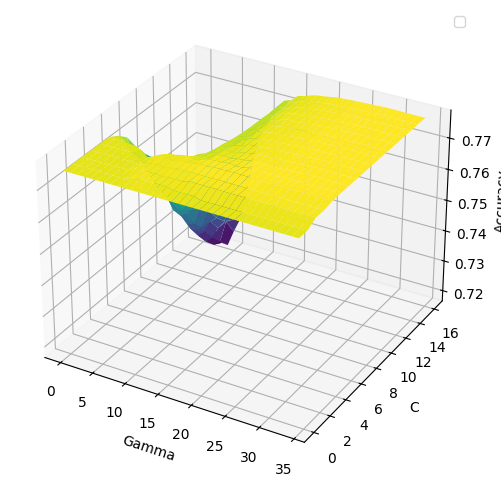

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


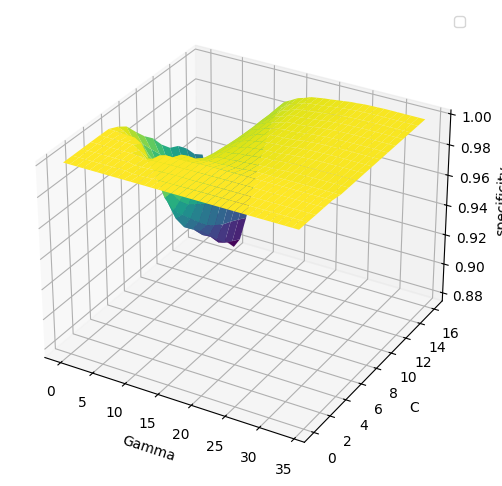

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


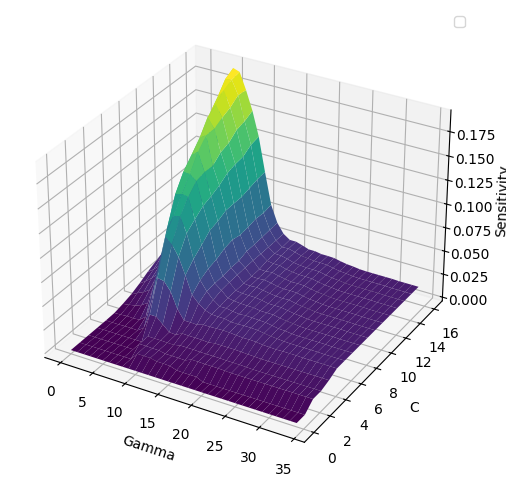

In [18]:
def plot_3D(data, label):
    x = np.arange(0, 35)
    y = np.arange(0, 17)
    x, y = np.meshgrid(x, y)


    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, data, cmap='viridis')

    ax.set_xlabel('Gamma')
    ax.set_ylabel('C')
    ax.set_zlabel(label)

    plt.legend()
    plt.show()

plot_3D(acc, 'Accuracy')
plot_3D(spp, 'specificity')
plot_3D(sen, 'Sensitivity')

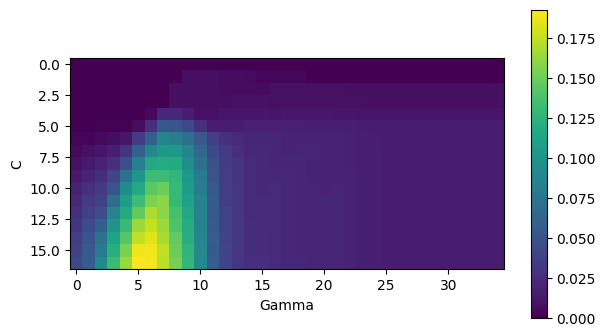

In [10]:
fig = plt.figure(figsize=(7, 4))
plt.imshow(sen, cmap='viridis', interpolation='nearest')
plt.colorbar()

plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

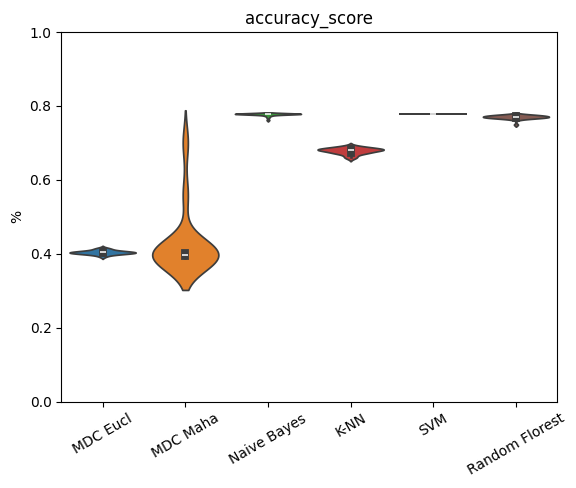

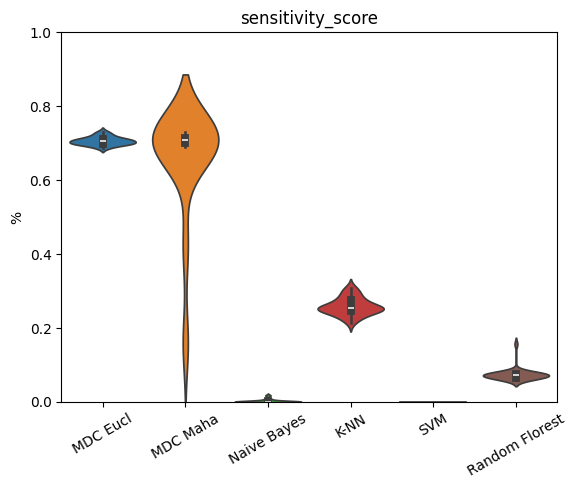

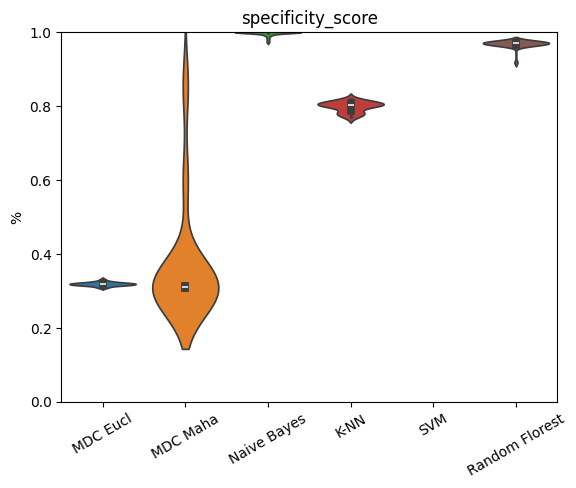

In [12]:
csvs = ['NearestCentroid', 'NearestCentroidMahalanobis', 'GaussianNB', 'KNeighborsClassifier', 'SVM', 'RandomForestClassifier']
labels = ['MDC Eucl', 'MDC Maha', 'Naive Bayes', 'K-NN', 'SVM', 'Random Florest']

def visual_score(paths, labels, feature):
    accuracy = {}
    for csv in paths:
        
        df = pd.read_csv(f"./new_exp/Classification_KW_{csv}.csv")
        accuracy[csv] = df[feature]
    
    plt.figure()
    sns.violinplot(data=accuracy)
    plt.title(feature)
    plt.ylim(0, 1)
    plt.ylabel("%")
    plt.xticks(rotation=30)
    plt.xticks(range(len(labels)), labels)
    plt.show()

visual_score(csvs, labels, 'accuracy_score')
visual_score(csvs, labels, 'sensitivity_score')
visual_score(csvs, labels, 'specificity_score')

# Final Visualization

In [13]:

acc = ['./exp/NearestCentroid.csv', './exp/NearestCentroidMahalanobis.csv', './exp/LDA_MDC_euc.csv',
       './new_exp/Classification_PCA_NearestCentroid.csv']


def visual_score(paths, lables, feature):
    accuracy = {}
    for csv in paths:
        print(csv)
        df = pd.read_csv(csv)
        accuracy[csv] = df[feature]
    
    plt.figure()
    sns.violinplot(data=accuracy)
    plt.title(feature)
    plt.ylim(0, 1)
    plt.ylabel("%")
    plt.xticks(rotation=30)
    plt.xticks(range(len(lables)), lables)
    plt.show()

visual_score(csvs, labels, 'accuracy_score')

FileNotFoundError: [Errno 2] No such file or directory: 'NearestCentroid'